In [1]:
%matplotlib inline

/Users/yaolun/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Following the procedure that Herschel helpdesk suggests

### Compare HSA product with CDF product

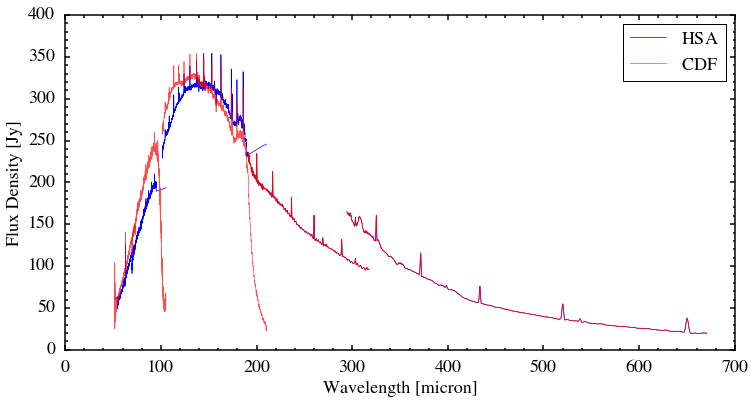

In [2]:
from astropy.io import ascii, fits
import astropy.constants as const
import matplotlib.pyplot as plt

c = const.c.cgs.value

# read HSA products
pacs_spec = []
pacs_ver = 'spec3x3'
for cam in ['b1','b2','r1','r2']:
    pacs_spec.append(ascii.read('/Users/yaolun/bhr71/calibration_testing/HSA/BHR71_'+pacs_ver+'_'+cam+'.txt',
                                data_start=4, names=['wave','flux']))
    
spire = fits.open('/Users/yaolun/bhr71/calibration_testing/HSA/bhr71_spire_point_apod.fits')
slw = [c/1e5/spire[5].data.field(0), spire[5].data.field(1)]
ssw = [c/1e5/spire[18].data.field(0), spire[18].data.field(1)]

# read CDF products
pacs_c = ascii.read('/Users/yaolun/bhr71/data/Herschel_spec/BHR71_central9Spaxels_PointSourceCorrected_trim.txt',
                      names=['wave','flux'], data_start=1)
# read the CDF pacs products by camera
pacs_spec_cdf = []
for foo in ['1342212230_blue','1342212230_red','1342212231_blue','1342212231_red']:
    pacs_spec_cdf.append(ascii.read(
        '/Users/yaolun/bhr71/calibration_testing/CDF/BHR71_'+pacs_ver+
        '_OBSID_'+foo+'_finalcubes_slice00_os8_sf7.fits.txt',
        names=['wave','flux'], data_start=4))

spire_c = fits.open('/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits')
slw_cdf = [c/1e5/spire_c[5].data.field(0), spire_c[5].data.field(1)]
ssw_cdf = [c/1e5/spire_c[18].data.field(0), spire_c[18].data.field(1)]

# plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# plot HSA
for i in range(len(pacs_spec)):
    pacs_hsa, = ax.plot(pacs_spec[i]['wave'], pacs_spec[i]['flux'], color='b', linestyle='-', linewidth=0.7)
spire_hsa, = ax.plot(slw[0], slw[1], color='b', linestyle='-', linewidth=0.7)
ax.plot(ssw[0], ssw[1], color='b', linestyle='-', linewidth=0.7)

# plot CDF
for i in range(len(pacs_spec_cdf)):
    pacs_cdf, = ax.plot(pacs_spec_cdf[i]['wave'], pacs_spec_cdf[i]['flux'], 
                        color='r', linestyle='-', linewidth=0.7, alpha=0.7)
# pacs_cdf, = ax.plot(pacs_c['wave'], pacs_c['flux'], color='r', linestyle='-', linewidth=0.7)
spire_cdf, = ax.plot(slw_cdf[0], slw_cdf[1], color='r', linestyle='-', linewidth=0.7)
ax.plot(ssw_cdf[0], ssw_cdf[1], color='r', linestyle='-', linewidth=0.7)

ax.legend([pacs_hsa, pacs_cdf], [r'$\rm{HSA}$', r'$\rm{CDF}$'], fontsize=18, numpoints=1)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Wavelength [micron]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
fig.savefig('/Users/yaolun/bhr71/calibration_testing/cdf_hsa.pdf',
            format='pdf', dpi=300, bbox_inches='tight')

### Semi-extended correction suggested by Herschel helpdesk

In [5]:
name = 'tophat21'

In [6]:
# for bhr71 calibration 
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
# import seaborn as sns

irs = ascii.read('/Users/yaolun/bhr71/data/bhr71_spitzer_irs.txt',data_start=2, names=['Wavelength','Flux','Uncertainty'])
# SE-corrected from HSA products
pacs_b1 = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_b1_'+name+'.txt', data_start=4)
pacs_b2 = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_b2_'+name+'.txt', data_start=4)
pacs_r1 = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_r1_'+name+'.txt', data_start=4)
pacs_r2 = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_r2_'+name+'.txt', data_start=4)
spire = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_100_'+name+'.txt', data_start=4)

# SE-corrected from CDF products
# pacs_b1_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_b1_cdf_'+name+'.txt', data_start=4)
# pacs_b2_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_b2_cdf_'+name+'.txt', data_start=4)
# pacs_r1_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_r1_cdf_'+name+'.txt', data_start=4)
# pacs_r2_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_r2_cdf_'+name+'.txt', data_start=4)
# spire_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_100_cdf_'+name+'.txt', data_start=4)

spire_yly = ascii.read('/Users/yaolun/bhr71/bhr71_SECT/bhr71_spire_corrected_yly.txt')
spire_makiwa = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_makiwa.txt', data_start=4)
spire_makiwa_radius = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_makiwa_31.txt', data_start=4)

spire_ext = fits.open('/Users/yaolun/bhr71/calibration_testing/HSA/bhr71_spire_extended_apod.fits')

spire_slw = ascii.read('/Users/yaolun/bhr71/calibration_testing/bhr71_slw_tophat_weighted_sum.txt',
                       names=['wave','flux'])

# PACS data from CDF archive
pacs_cdf = ascii.read('/Users/yaolun/bhr71/data/Herschel_spec/BHR71_central9Spaxels_PointSourceCorrected_trim.txt')
# sum over 25 spaxels
pacs_5x5 = ascii.read('/Users/yaolun/test/BHR71_pacs_summed_5x5_os8_sf7.txt', names=['Wavelength','Flux'])

(0, 450)

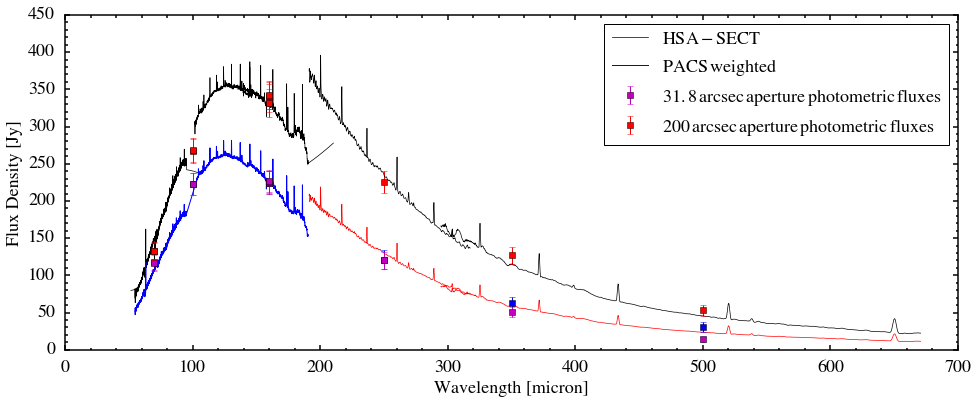

In [11]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

# PACS CDF
# ax.plot(pacs_cdf['Wavelength(um)'], pacs_cdf['Flux_Density(Jy)'], color='Grey', linewidth=0.7)

# ax.plot(irs['Wavelength'], irs['Flux'], linewidth=0.7)
hsa_sect, = ax.plot(pacs_b1['wave_0'], pacs_b1['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_b2['wave_0'], pacs_b2['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_r1['wave_0'], pacs_r1['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_r2['wave_0'], pacs_r2['flux_0'], linewidth=0.7, color='k')
ax.plot(spire['wave_segm1_0'], spire['flux_segm1_0'], linewidth=0.7, color='k')
ax.plot(spire['wave_segm2_0'], spire['flux_segm2_0'], linewidth=0.7, color='k')

ax.plot(spire_makiwa['wave_segm1_0'], spire_makiwa['flux_segm1_0'], linewidth=0.7, color='r')
ax.plot(spire_makiwa['wave_segm2_0'], spire_makiwa['flux_segm2_0'], linewidth=0.7, color='r')
ax.errorbar([250,350,500],[121.019,62.392,30.9], yerr=[12.92,9.086,6.616],
            marker='s', color='b', linestyle='None')
# ax.plot([250,350,500], [136.77, 81.9, 25.8], marker='s', color='g', linestyle='None')

# ax.plot(spire_makiwa_radius['wave_segm1_0'], spire_makiwa_radius['flux_segm1_0'], linewidth=0.7, color='r')
# ax.plot(spire_makiwa_radius['wave_segm2_0'], spire_makiwa_radius['flux_segm2_0'], linewidth=0.7, color='r')

# spire_hsa, = ax.plot(slw[0], slw[1], color='b', linestyle='-', linewidth=0.7)
# ax.plot(ssw[0], ssw[1], color='b', linestyle='-', linewidth=0.7)

# area = 15.9**2*np.pi
# ax.plot(c/1e5/spire_ext[11].data.field(0), spire_ext[11].data.field(1)*1e7/1e4*1e23/4.25e10*area, color='g')
# ax.plot(c/1e5/spire_ext[39].data.field(0), spire_ext[39].data.field(1)*1e7/1e4*1e23/4.25e10*(8.24**2*np.pi)*2.38, color='g')
# #

# ax.plot(spire_slw['wave'], spire_slw['flux'])

# CDF
# cdf_sect, = ax.plot(pacs_b1_cdf['wave_0'], pacs_b1_cdf['flux_0'], linewidth=0.7, color='b')
# ax.plot(pacs_b2_cdf['wave_0'], pacs_b2_cdf['flux_0'], linewidth=0.7, color='b')
# ax.plot(pacs_r1_cdf['wave_0'], pacs_r1_cdf['flux_0'], linewidth=0.7, color='b')
# ax.plot(pacs_r2_cdf['wave_0'], pacs_r2_cdf['flux_0'], linewidth=0.7, color='b')

# summed spectra from rebinned cube
# spec_sum3, = ax.plot(sum3['wave'], sum3['flux'], color='Cyan', linewidth=0.7)
# ax.plot(sum5['wave'], sum5['flux'], color='Cyan', linewidth=0.7)
# ax.plot(cen['wave'], cen['flux'])

spec_pacs_weight, = ax.plot(pacs_weight['Wavelength(um)'], pacs_weight['Flux(Jy)'])
# spec_spire_slw_weight, = ax.plot(spire_slw_weight['Wavelength(um)'], spire_slw_weight['Flux(Jy)'])

# spire_cor, = ax.plot(spire_yly['Wavelength(um)'], spire_yly['Flux(Jy)'], color='r')

# ax.plot(pacs_5x5['Wavelength'], pacs_5x5['Flux'], linewidth=0.7)

# put in photometry
phot = ax.errorbar([70,70,100,100,160,160,160,160,250,350,500],
                   [117.45,117.01,222.83,222.77,224.77,224.75,225.26,226.98,120.18,50.66,14.02],
                   yerr=[10.84,10.82,14.93,14.93,14.99,14.99,15.01,15.07,10.96,7.12,3.75],
                   marker='s', color='m', linestyle='None')
phot100 = ax.errorbar([70,70,100,100,160,160,160,160,250,350,500],
                   [132.62,132.91,267.24,268.87,338.41,331.69,341.70,342.69,225.14,127.13,52.92],
                   yerr=[11.52,11.53,16.35,16.40,18.40,18.21,18.49,18.51,15.01,11.28,7.28],
                   marker='s', color='r', linestyle='None')
# phot21 = ax.errorbar([70,70,100,100,160,160,160,160],
#                      [104.28, 103.56, 187.37, 187.52, 170.80, 170.97, 171.61, 174.35],
#                      yerr=[10.21, 10.18, 13.69, 13.69, 13.07, 13.08, 13.1, 13.2],
#                      marker='s', color='b', linestyle='None')

# photometry measured within a 100" radius aperture
# [132.62,132.91,267.24,268.87,338.41,331.69,341.70,342.69,225.14,127.13,52.92]
# yerr = [11.52,11.53,16.35,16.40,18.40,18.21,18.49,18.51,15.01,11.28,7.28]

# photometry measured within 31.8" diameter aperture
# [117.45,117.01,222.83,222.77,224.77,224.75,225.26,226.98,224.84,65.31,13.47]
# yerr = [10.84,10.82,14.93,14.93,14.99,14.99,15.01,15.07,10.96,7.12,3.75]

# photometry measured within 21.9" diameter aperture
# [104,28, 103.56, 187.37, 187.52, 170.80, 170.97, 171.61, 174.35]
# yerr = [10.21, 10.18, 13.69, 13.69, 13.07, 13.08, 13.1, 13.2]

ax.legend([hsa_sect,
           spec_pacs_weight,
           phot, phot100],
          [r'$\rm{HSA-SECT}$',
#            r'$\rm{\Sigma\,3\times3}$',
           r'$\rm{PACS\,weighted}$',
           r'$\rm{31.8\,arcsec\,aperture\,photometric\,fluxes}$',
           r'$\rm{200\,arcsec\,aperture\,photometric\,fluxes}$',
#            r'$\rm{SPIRE\,corrected\,manually}$'
          ]
          , fontsize=18, numpoints=1)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Wavelength [micron]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
ax.set_ylim([0, 450])

# fig.savefig('/Users/yaolun/bhr71/calibration_testing/semi-extended_correction_'+name+'.pdf',
#             format='pdf', dpi=300, bbox_inches='tight')

## Best calibrated BHR71 spectra for Hyperion

03/27/16

PACS: Use the geometry extraction to get the spectra.

SPIRE: Use the prescription from Makiwa et al. 2016.

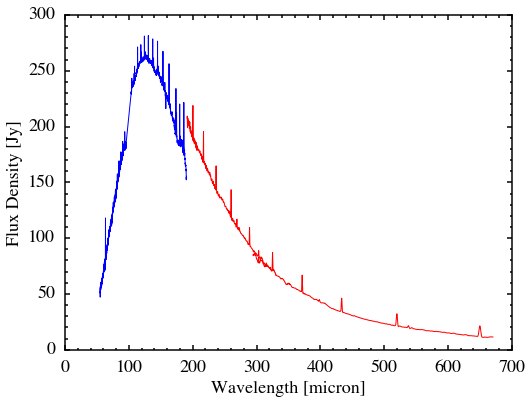

In [81]:
from astropy.io import ascii
import matplotlib.pyplot as plt

pacs_weight = ascii.read('/Users/yaolun/bhr71/calibration_testing/HSA/pacs_weighted_318aper.txt')
spire_makiwa = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_makiwa.txt', data_start=4)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(pacs_weight['Wavelength(um)'], pacs_weight['Flux(Jy)'], color='b', linestyle='-', linewidth=1)
ax.plot(spire_makiwa['wave_segm1_0'], spire_makiwa['flux_segm1_0'], linewidth=1, color='r')
ax.plot(spire_makiwa['wave_segm2_0'], spire_makiwa['flux_segm2_0'], linewidth=1, color='r')

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Wavelength [micron]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
# ax.set_ylim([0, 450])

### Read in summed 3x3 and 5x5 PACS spectra

In [8]:
sum3 = ascii.read('/Users/yaolun/bhr71/calibration_testing/summed/BHR71_pacs_summed_3x3_hsa.txt',
                  names=['wave','flux'])
sum5 = ascii.read('/Users/yaolun/bhr71/calibration_testing/summed/BHR71_pacs_summed_5x5_hsa.txt',
                  names=['wave','flux'])
cen = ascii.read('/Users/yaolun/bhr71/calibration_testing/HSA/cube/BHR71_pacs_pixel13_hsa.txt',
                 names=['wave','flux'])

In [9]:
pacs_weight = ascii.read('/Users/yaolun/bhr71/calibration_testing/HSA/pacs_weighted_318aper.txt')
spire_slw_weight = ascii.read('/Users/yaolun/bhr71/calibration_testing/bhr71_slw_tophat_weighted_sum.txt')

### Convolve a Guassian beam with images before taking aperture photometry for Makiwa's method

For SPIRE only

In [77]:
# path to files
indir = '/Users/yaolun/bhr71/data/photometry/herschel_photometry/'
pacs70 = indir+'1342224922/level2/HPPPMAPB/hpacs1342224922_20hpppmapb_00_1431606963402.fits'
pacs100 = indir+'1342224923/level2/HPPPMAPB/hpacs1342224923_20hpppmapb_00_1431608216039.fits'
pacs160 = indir+'1342224923/level2/HPPPMAPR/hpacs1342224923_20hpppmapr_00_1431608216611.fits'
spire500 = indir+'1342226633/level2/extdPLW/hspireplw1342226633_20pxmp_1431669349619.fits'
spire350 = indir+'1342226633/level2/extdPMW/hspirepmw1342226633_20pxmp_1431669350070.fits'
spire250 = indir+'1342226633/level2/extdPSW/hspirepsw1342226633_20pxmp_1431669350548.fits'

In [139]:
from astropy.convolution import convolve, Gaussian2DKernel
from astropy.io import fits

data = fits.open(spire250)      # unit: MJy/sr
factor = 1e6/4.25e10*abs(data[1].header['CDELT1']*data[1].header['CDELT2'])*3600**2  # to Jy/pixel
# im = data[1].data*factor

# convolution part
aper_rad = 15.5/2  # FWHM
kernel = Gaussian2DKernel(aper_rad/abs(data[1].header['CDELT1'])/3600./2.354)
convolved_im = convolve(data[1].data, kernel)

# update FITS file
data[1].data = convolved_im
data.writeto('/Users/yaolun/bhr71/calibration_testing/bhr71_spire_250_gaussian.fits', clobber=True)

### Function of making image

In [25]:
def make_image(filepath,outdir=None,coord=None,size=0.03,plotname=None, plotdir=None, stretch='log', vmin=None,
               vmax=None, bar_size=30, aper=None, int_unit='MJy/sr', text=None):
    import numpy as np
    import aplpy as apl
    import matplotlib
    import matplotlib.pyplot as plt
    from astropy.io import fits
    from astropy import units as u
    from astropy.coordinates import SkyCoord
    import os

    mag = 1.5

    if coord == None:
        # source coordinate from Chen 2008
        # 12 01 36.81  -65 08 49.22
        coord = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
    print coord
#     img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='b', s=120, linewidth=2)

    # At 178 pc, 10000 AU correspond to 57.96 arcsec
    
    im = apl.FITSFigure(filepath,north=True)
    cmap = plt.cm.viridis
    print np.nanmin(fits.open(filepath)[1].data)
    im.show_colorscale(cmap=cmap,stretch=stretch, vmin=vmin, vmax=vmax)
    
    im.recenter(coord.ra.degree,coord.dec.degree,radius=size)

#     im.add_grid()
#     im.grid.set_xspacing(size/5.)
#     im.grid.set_yspacing(size/5.)
#     im.grid.set_color('green')
    im.set_nan_color('black')
    im.tick_labels.set_font(size=18)
    # im.set_grid_alpha(0.2)

    im.add_colorbar()
    im.colorbar.set_font(size=20)
    im.colorbar.set_axis_label_text('Intensity ('+int_unit+')')
    im.colorbar.set_axis_label_font(size=20)
#     im.colorbar.set_frame_color('face')
    im.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
#     im.set_tick_labels_format(xformat='ddd.ddddd',yformat='ddd.ddddd')
    im.ticks.set_xspacing(2/60.)
    im.ticks.set_yspacing(1/60.)
    im.axis_labels.set_font(size=20)
    im.ticks.set_linewidth(2)
    
    im.add_scalebar(bar_size/3600.)
    im.scalebar.set_length(bar_size * u.arcsecond)
    im.scalebar.set_label(r'$\rm{'+str(bar_size)+'\,arcsec}$')
    im.scalebar.set_font(size=20, weight='bold')
    im.scalebar.set(linestyle='solid', color='white', linewidth=3)
    
    # print image information
    if text != None:
        im.add_label(0.85, 0.9, text, size='xx-large', weight='bold', relative=True, color='white')
    
    # plot a circular region for aperture
    if aper != None:
        im.show_circles([coord.ra.degree], [coord.dec.degree], [aper/3600.], color='lime', linewidth=3)
    
    if plotdir == None:
        plotdir = os.path.dirname(filepath)
    if plotname == None:
        plotname = raw_input('What is the plot name: ')
        print plotname
    im.save(plotdir+'/'+plotname+'.pdf',format='pdf',transparent=True, dpi=300)


<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>
INFO

INFO:astropy:Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpFGniTt


: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpFGniTt [montage_wrapper.wrappers]
60.8407925302

INFO:astropy:Auto-setting vmin to  6.879e+01



INFO: Auto-setting vmin to  6.879e+01 [aplpy.core]
<SkyCoord (ICRS): (ra, dec) in deg
    (180.403375, -65.14700556)>


INFO

INFO:astropy:Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpkYQ1Pb


: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpkYQ1Pb [montage_wrapper.wrappers]
0.0

INFO:astropy:Auto-setting vmin to  0.000e+00



INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]


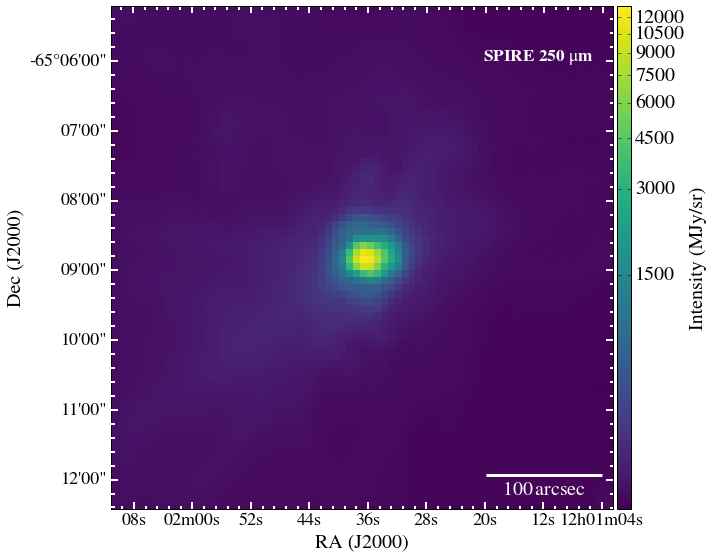

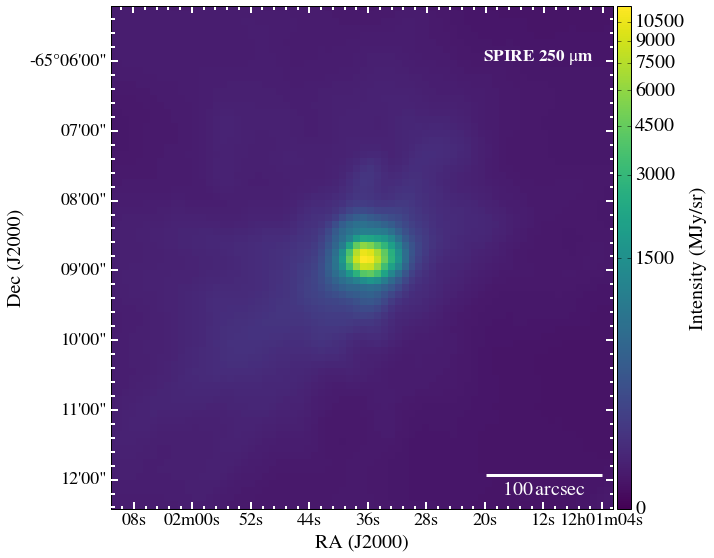

In [141]:
# make plot to compare the difference
make_image(spire250, plotname='spire250', stretch='arcsinh', size=0.06, bar_size=100,
           vmax=np.nanmax(fits.open(spire250)[1].data), int_unit='MJy/sr',
           text='SPIRE 250 $\mu$m', plotdir='/Users/yaolun/test/')

spire250_gaussian = '/Users/yaolun/bhr71/calibration_testing/bhr71_spire_250_gaussian.fits'
make_image(spire250_gaussian, plotname='spire250_gaussaian', stretch='arcsinh', size=0.06, bar_size=100,
           vmax=np.nanmax(fits.open(spire250_gaussian)[1].data), int_unit='MJy/sr',
           text='SPIRE 250 $\mu$m', plotdir='/Users/yaolun/test/')

### Perform aperture photometry

In [142]:
from photutils import aperture_photometry as ap
from photutils import CircularAperture
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy import wcs

im_list = [fits.open(spire250), fits.open(spire250_gaussian)]
# coord = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
coord = SkyCoord('12 01 36.3 -65 08 53.0', unit=(u.hourangle, u.deg))
aper_rad = 15.5/2

for im in im_list:
    w = wcs.WCS(im[1].header)
    pixcoord = w.wcs_world2pix(coord.ra.degree, coord.dec.degree, 1)
    pix2arcsec = abs(im[1].header['CDELT1'])*3600
    aperture = CircularAperture((pixcoord[0],pixcoord[1]), r=aper_rad/pix2arcsec)
    factor = 1e6/4.25e10*abs(im[1].header['CDELT1']*im[1].header['CDELT2'])*3600**2  # to Jy/pixel
    phot_table = ap(im[1], aperture) 
    print phot_table['aperture_sum']*factor

 aperture_sum
   MJy / sr  
-------------
39.3121906652
 aperture_sum
   MJy / sr  
-------------
37.2170102242


### Test on L1521F (Makiwa et al. 2013)

/Users/yaolun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide


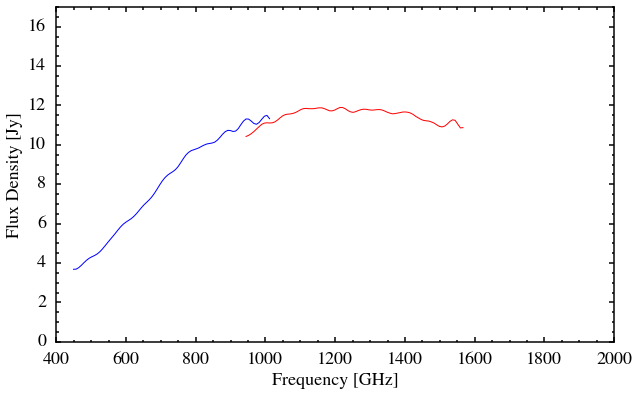

In [9]:
l1521f = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_makiwa_l1521f.txt', data_start=4)

import astropy.constants as const
c = const.c.cgs.value

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

spire, = ax.plot(c/1e5/l1521f['wave_segm1_0'], l1521f['flux_segm1_0'], linewidth=1, color='b')
ax.plot(c/1e5/l1521f['wave_segm2_0'], l1521f['flux_segm2_0'], linewidth=1, color='r')

# psrc = ax.errorbar([c/1e5/250., c/1e5/350.,c/1e5/500.], phot*ccor, yerr=phot_err*ccor,
#             marker='s', linestyle='None', color='b', mec='None', markersize=10, linewidth=1.5, markeredgewidth=1.5)
# psrc_spire = ax.errorbar([c/1e5/250., c/1e5/350.,c/1e5/500.], [8.06,12.12,6.47], yerr=[3.25,3.94,2.98],
#                 marker='s', linestyle='None', color='m', mec='None', markersize=10, linewidth=1.5, markeredgewidth=1.5)
# extd_spire = ax.errorbar([c/1e5/250., c/1e5/350.,c/1e5/500.], [6.17,9.47,4.79], yerr=[2.49,3.08,2.19],
#                 marker='s', linestyle='None', color='g', mec='None', markersize=10, linewidth=1.5, markeredgewidth=1.5)

# ax.legend([spire, psrc, psrc_spire, extd_spire],
#           [r'$\rm{L1521F-SECT}$', r'$\rm{psrc}$', r'$\rm{psrc-optimum}$', r'$\rm{extd-optimum}$'],
#           fontsize=16, loc='best', numpoints=1)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Frequency [GHz]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
ax.set_ylim([0, 17])
ax.set_xlim([400,2000])

fig.savefig('/Users/yaolun/bhr71/calibration_testing/L1521F.pdf', format='pdf', dpi=300, bbox_inches='tight')

### get spectral index for 250 um, 350 um, and 500 um

2.03759282494
2.35190168669
2.58936916928


/Users/yaolun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/Users/yaolun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in divide
/Users/yaolun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide
/Users/yaolun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in divide


(400, 2000)

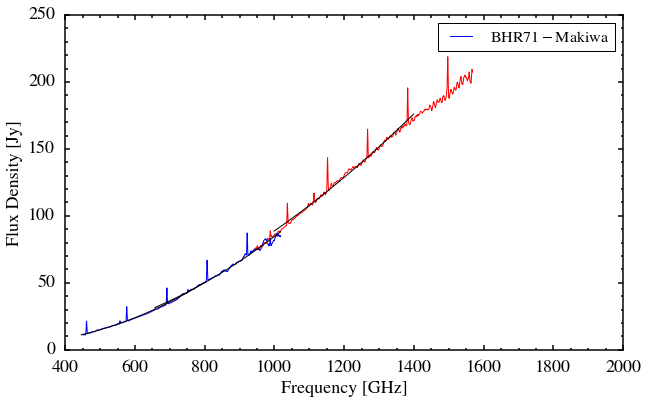

In [11]:
# Note that the spectral index works in frequency
from astropy.modeling import models, fitting, powerlaws
from scipy.interpolate import interp1d
import astropy.constants as const
c = const.c.cgs.value

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

spire, = ax.plot(c/1e5/spire_makiwa['wave_segm1_0'], spire_makiwa['flux_segm1_0'], linewidth=1, color='b')
ax.plot(c/1e5/spire_makiwa['wave_segm2_0'], spire_makiwa['flux_segm2_0'], linewidth=1, color='r')

f_ssw = interp1d(c/1e5/spire_makiwa['wave_segm2_0'], spire_makiwa['flux_segm2_0'])
f_slw = interp1d(c/1e5/spire_makiwa['wave_segm1_0'], spire_makiwa['flux_segm1_0'])
fitted_alpha = []

for band in [250, 350, 500]:
    x_ref = c/1e5/band
    if band != 250:
        amp = f_slw(x_ref)
        freq_dum = (c/1e5/spire_makiwa['wave_segm1_0'])\
                   [(c/1e5/spire_makiwa['wave_segm1_0'] >= x_ref-200) & (c/1e5/spire_makiwa['wave_segm1_0'] <= x_ref+200)]
        flux_dum = spire_makiwa['flux_segm1_0']\
                   [(c/1e5/spire_makiwa['wave_segm1_0'] >= x_ref-200) & (c/1e5/spire_makiwa['wave_segm1_0'] <= x_ref+200)]
    else:
        amp = f_ssw(x_ref)
        freq_dum = (c/1e5/spire_makiwa['wave_segm2_0'])\
                   [(c/1e5/spire_makiwa['wave_segm2_0'] >= x_ref-200) & (c/1e5/spire_makiwa['wave_segm2_0'] <= x_ref+200)]
        flux_dum = spire_makiwa['flux_segm2_0']\
                   [(c/1e5/spire_makiwa['wave_segm2_0'] >= x_ref-200) & (c/1e5/spire_makiwa['wave_segm2_0'] <= x_ref+200)]
    alpha = 0
    
    pow_model = powerlaws.PowerLaw1D(amp, x_ref, alpha)
    fitter = fitting.LevMarLSQFitter()
    fit = fitter(pow_model, freq_dum, flux_dum)
    ax.plot(freq_dum, fit(freq_dum), '-', color='k')
    # take negative sign because the frequency array is reversed
    fitted_alpha.append(-fit.alpha.value)
    print -fit.alpha

ax.legend([spire], [r'$\rm{BHR71-Makiwa}$'], fontsize=16, loc='best')

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Frequency [GHz]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
# ax.set_ylim([0, 15])
ax.set_xlim([400,2000])

### Read in color corrections of SPIRE

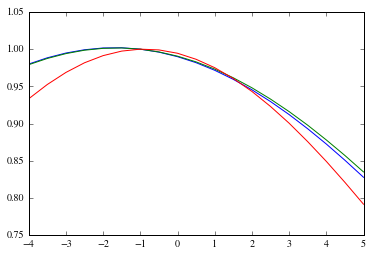

In [58]:
color_cor = ascii.read('/Users/yaolun/programs/misc/color_corrections_spire.txt')
ccor_psrcPSW = interp1d(color_cor['alpha'], color_cor['psrcPSW'], kind='linear')
ccor_psrcPMW = interp1d(color_cor['alpha'], color_cor['psrcPMW'], kind='linear')
ccor_psrcPLW = interp1d(color_cor['alpha'], color_cor['psrcPLW'], kind='linear')
plt.plot(color_cor['alpha'], color_cor['psrcPSW'])
plt.plot(color_cor['alpha'], color_cor['psrcPMW'])
plt.plot(color_cor['alpha'], color_cor['psrcPLW'])

In [69]:
# with approx. factor that approximating the beams and the pixels have the same shape.
phot = np.array([8.61, 12.35, 6.31])  # 250, 350, and 500 um
phot_err = np.array([0.98, 1.42, 0.98])

# Assume the beams are circular and the pixels are square.
phot = np.array([11.06, 15.73, 7.96])
phot_err = np.array([1.25, 1.80, 1.23])

ccor = np.array([ccor_psrcPSW(fitted_alpha[0]), ccor_psrcPMW(fitted_alpha[1]), ccor_psrcPLW(fitted_alpha[2])])
print phot*ccor

print fitted_alpha
print ccor_psrcPSW(fitted_alpha[0]), ccor_psrcPMW(fitted_alpha[1]), ccor_psrcPLW(fitted_alpha[2])

[ 10.93257132  15.31141518   7.56191592]
[0.08775190131375192, 0.99023738790148796, 1.804901235827203]
0.988478419199 0.973389394675 0.949989436993


### Image of L1521F

<SkyCoord (ICRS): (ra, dec) in deg
    (67.16458333, 26.85958333)>
INFO

INFO:astropy:Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpUEEgaM


: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpUEEgaM [montage_wrapper.wrappers]
-300.025988075


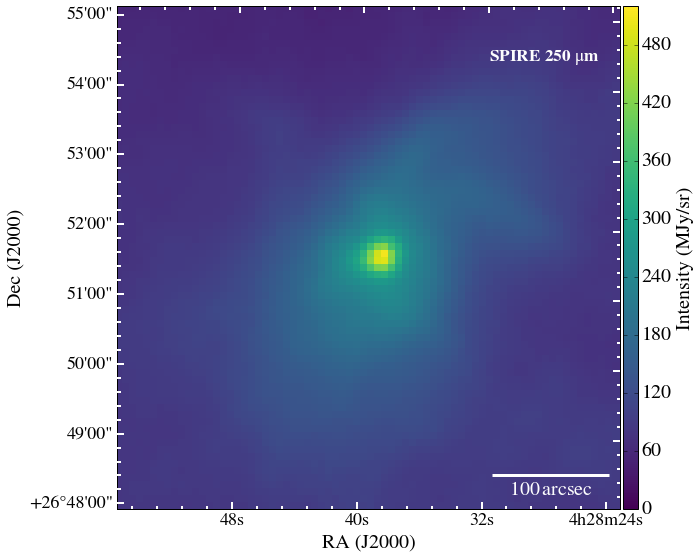

In [28]:
im_l1521f = '/Users/yaolun/bhr71/calibration_testing/data/L1521/1342202254/level2/extdPSW/hspirepsw1342202254_20pxmp_1455049495805.fits'
from astropy import units as u
from astropy.coordinates import SkyCoord
coord = SkyCoord('04 28 39.5 26 51 34.5', unit=(u.hourangle, u.deg))
make_image(im_l1521f, plotname='L1521F_spire250', stretch='linear', size=0.06, bar_size=100, coord=coord,
           int_unit='MJy/sr', text='SPIRE 250 $\mu$m', plotdir='/Users/yaolun/bhr71/calibration_testing/',
           vmin=0, vmax=520)

### Test the effect of $\tt{gaussRefBeamDiam}$

In [ ]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
spire = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_100.txt', data_start=4)

# other diameters
# 40"
spire40 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_40.txt', data_start=4)
# 60"
spire60 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_60.txt', data_start=4)
# 80"
spire80 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_80.txt', data_start=4)
# 120"
spire120 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_120.txt', data_start=4)
# 200"
spire200 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_200.txt', data_start=4)

colorlist = sns.color_palette("husl",5)
# colorlist = ['#edf8fb','#bfd3e6','#9ebcda','#8c96c6','#8856a7','#810f7c']

# plot
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

ax.plot(pacs_b1['wave_0'], pacs_b1['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_b2['wave_0'], pacs_b2['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_r1['wave_0'], pacs_r1['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_r2['wave_0'], pacs_r2['flux_0'], linewidth=0.7, color='k')


diam40, = ax.plot(spire40['wave_segm1_0'], spire40['flux_segm1_0'], linewidth=0.7, color=colorlist[0])
ax.plot(spire40['wave_segm2_0'], spire40['flux_segm2_0'], linewidth=0.7, color=colorlist[0])

diam60, = ax.plot(spire60['wave_segm1_0'], spire60['flux_segm1_0'], linewidth=0.7, color=colorlist[1])
ax.plot(spire60['wave_segm2_0'], spire60['flux_segm2_0'], linewidth=0.7, color=colorlist[1])

diam80, = ax.plot(spire80['wave_segm1_0'], spire80['flux_segm1_0'], linewidth=0.7, color=colorlist[2])
ax.plot(spire80['wave_segm2_0'], spire80['flux_segm2_0'], linewidth=0.7, color=colorlist[2])

diam100, = ax.plot(spire['wave_0'], spire['flux_0'], linewidth=0.7, color=colorlist[3])
ax.plot(spire['wave_1'], spire['flux_1'], linewidth=0.7, color=colorlist[3])

# diam120, = ax.plot(spire120['wave_segm1_0'], spire120['flux_segm1_0'], linewidth=0.7, color=colorlist[4])
# ax.plot(spire120['wave_segm2_0'], spire120['flux_segm2_0'], linewidth=0.7, color=colorlist[4])

diam200, = ax.plot(spire200['wave_segm1_0'], spire200['flux_segm1_0'], linewidth=0.7, color=colorlist[4])
ax.plot(spire200['wave_segm2_0'], spire200['flux_segm2_0'], linewidth=0.7, color=colorlist[4])


ax.legend([diam200, diam100, diam80, diam60, diam40],
          [r'$\tt{gaussRefBeamDiam}=\rm{200\,arcsec}$',
#            r'$\tt{gaussRefBeamDiam}=\rm{120\,arcsec}$',
           r'$\tt{gaussRefBeamDiam}=\rm{100\,arcsec}$',
           r'$\tt{gaussRefBeamDiam}=\rm{80\,arcsec}$',
           r'$\tt{gaussRefBeamDiam}=\rm{60\,arcsec}$',
           r'$\tt{gaussRefBeamDiam}=\rm{40\,arcsec}$'],
          loc='best', fontsize=16, numpoints=1)
# [ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on() 
ax.tick_params('both',labelsize=18,which='major',pad=15)
ax.tick_params('both',labelsize=18,which='minor',pad=15)
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)

ax.set_xlim([150,700])
ax.set_ylim([0,500])
fig.savefig('/Users/yaolun/bhr71/calibration_testing/sect_gaussbeam_test.pdf',
            format='pdf', dpi=300, bbox_inches='tight')